Let's look at a practical way of performing a polynomial regression.

In this example we are going to predict the salary of a candidate given the experience the candidate has. The HR of Sanford and Sons Limited, is looking to hire for a senior postion in the company. As a policy, the company has a salary distribution dataset that they use to determine how much salary to give to their employees based on their experience. As a data scientist, you are tasked creating a model that will help them with making salary predictions given  years of experience. In this case, we want to predict the amount of salary a canditate with 6 and half years of experience should get. You are provided with following dataset.

[Download Dataset](https://drive.google.com/file/d/153tLxmGZxDhVmh2o0wUP8UjFPZPmW0Ux/view?usp=sharing)

# Importing the libraries 





In [356]:
import numpy as np

import pandas as pd

import seaborn as sns 

import matplotlib.pyplot as plt

from sklearn import metrics

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures 

%matplotlib inline 

# Load Data 

In [357]:
#We have loaded the data 
dataset=pd.read_csv('../position_salaries.csv')

In [358]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [359]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [360]:
#Head 

dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [361]:

X = dataset.iloc[:,1:2 ].values
y=dataset.iloc[:,-1].values
print(X)
print(y)


[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


# Analysis of the data 

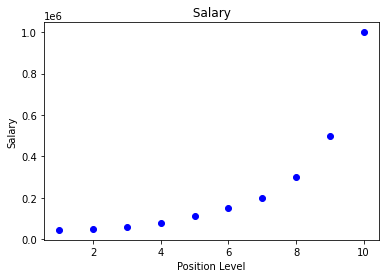

In [362]:
plt.scatter(X,y,color='blue')
plt.title(" Salary ")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

**Observation**

From the scatter plot, the data does not appear to be linear. So if were to fit a simple linear straight line, it would not cover most of the points. Which is why applying Linear regression on this dataset would not give us the correct value.

The other alternative we are left with is applying polynomial regression.

**Manual prediction**

Before we dive into polynomial regression, let's do some manual prediction of own and then we can compare the results we get to the results we'll get after doing polynomial regression in a short while.

From our problem statement, we need to predict the salary of a candidate with 6.5 years of experience. From our dataset, we already know the salary for  candidates with 6 and 7 years of experience which is Ksh 150,000 and Ksh 200,000 respectively.This means that the salary for a candidate with 6.5 years of experience lies between this two years.Therefore, all we need to do is get the mean of this two years, right?

(150,000 + 200,000)/ 2 = KSh 175,000

From this, we can conclude that the desired salary is 175,000

Now let's do it using polynomial regression

# Split the dataset 

In [363]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)


reg_line=LinearRegression()

reg_line.fit(X,y)

LinearRegression()

# Visualize the Linear Regression results 

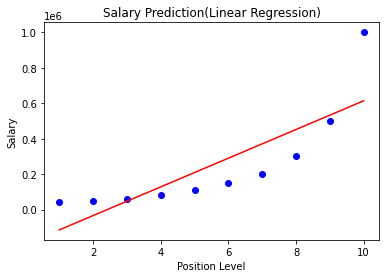

In [364]:
plt.scatter(X,y ,color="blue")
plt.plot(X,reg_line.predict(X), color='red')
plt.title('Salary Prediction(Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [365]:
# Fit polynomial Regression to the dataset

poly_reg=PolynomialFeatures(degree=6)

X_poly=poly_reg.fit_transform(X)


pol_reg=LinearRegression()

pol_reg.fit(X_poly,y)


LinearRegression()

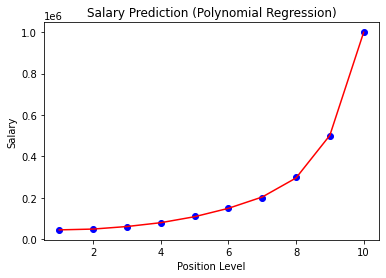

In [366]:
plt.scatter(X,y, color='blue')
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Salary Prediction (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

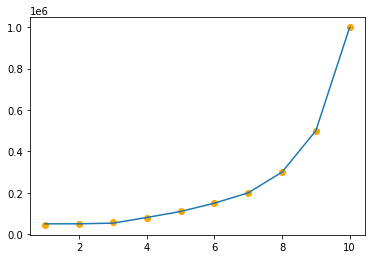

In [367]:
poly_reg=PolynomialFeatures(degree=20)

poly_reg_f=poly_reg.fit_transform(X)

pl=LinearRegression()

pl.fit(poly_reg_f,y)


plt.scatter(X, y, color='orange')

plt.plot(X,pl.predict(poly_reg_f) )






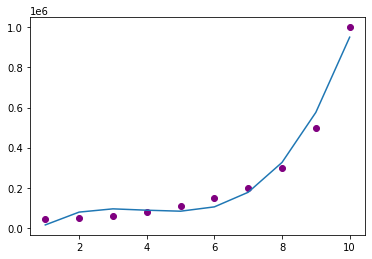

In [369]:
from sklearn.preprocessing import PolynomialFeatures


features=PolynomialFeatures(degree=3)

features_1=features.fit_transform(X)

poly_reg=LinearRegression()

poly_reg_2=poly_reg.fit(features_1, y)

plt.scatter(X,y, color='purple')
plt.plot(X, poly_reg_2.predict(features_1))
